# Guided Project: Finding Heavy Traffic Indicators on I-94

In this project, we're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. 

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

Thus, the results of our analysis will be about the westbound traffic in the proximity of that station. 

## Exploring the dataset

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(traffic.head(5))
print(traffic.tail(5))
traffic.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

## Analysing traffic volume

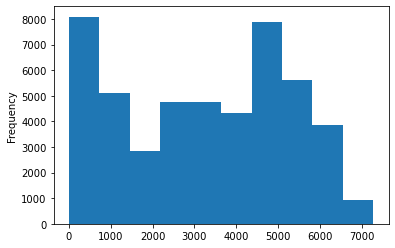

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
traffic["traffic_volume"].plot.hist()
plt.show()

In [3]:
print(traffic["traffic_volume"].value_counts(bins=10).sort_index())
print("\n")
print(traffic["traffic_volume"].describe())

(-7.281000000000001, 728.0]    8095
(728.0, 1456.0]                5100
(1456.0, 2184.0]               2835
(2184.0, 2912.0]               4765
(2912.0, 3640.0]               4761
(3640.0, 4368.0]               4349
(4368.0, 5096.0]               7886
(5096.0, 5824.0]               5634
(5824.0, 6552.0]               3854
(6552.0, 7280.0]                925
Name: traffic_volume, dtype: int64


count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


We can make the following observations;
- Over the period, the values ranged between 0 and 7280 traffic volume.
- Most typically, the number of traffic volume varies between 0 to 728, or between 4368 and 5096 - the 2 tallest bars are around that interval.

## Traffic Volume: Day vs. Night (I)

There is a possibility that nighttime and daytime might influence traffic volume. We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [4]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

In [5]:
day_time = traffic.copy()[(traffic["date_time"].dt.hour >= 7) & (traffic["date_time"].dt.hour <19)]
night_time = traffic.copy()[(traffic["date_time"].dt.hour >= 19) | (traffic["date_time"].dt.hour < 7)]
print(day_time.shape)
print(night_time.shape)      

(23877, 9)
(24327, 9)


## Traffic Volume: Day vs. Night (II)

We're going to compare the traffic volume at night and during day by plotting the histograms of 'traffic_volume' columns for both day and night dataset.

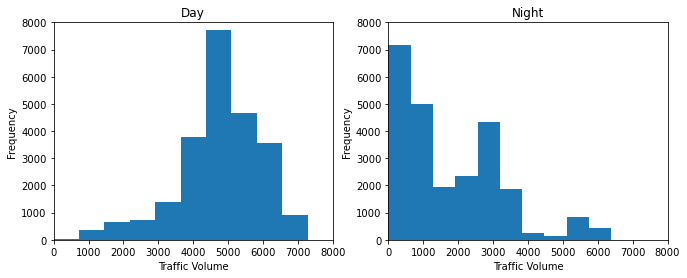

In [35]:
plt.figure(figsize=(11,4))

# The first subplot
plt.subplot(1,2,1)
day_time["traffic_volume"].plot.hist()
plt.title("Day")
plt.xlabel("Traffic Volume")
plt.xlim([0,8000])
plt.ylim([0,8000])

# The second subplot
plt.subplot(1,2,2)
night_time["traffic_volume"].plot.hist()
plt.title("Night")
plt.xlabel("Traffic Volume")
plt.xlim([0,8000])
plt.ylim([0,8000])
plt.show()

In [23]:
day_time["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [24]:
night_time["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The 'Night' histogram is right skewed. This means that the smaller traffic volume values occur in the data with higher frequency and the larger values occur with comparatively lesser frequency. On the other hand, the 'Day' histogram is left skewed, which means that the larger traffic volume values occur with higher frequency. Thus, the traffic at night can be said to be light compared to that at day time. As our goal is to find indicators of heavy traffic, we will be using the day time data moving forward.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

First, we'll look at monthly traffic volume averages

In [31]:
# Create a new column where each value describes the month when the traffic volume measurement was taken 
day_time["month"] = day_time["date_time"].dt.month

# Group the dataset by the month column with the mean as an aggregate function
by_month = day_time.groupby("month").mean()
print(by_month["traffic_volume"])

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64


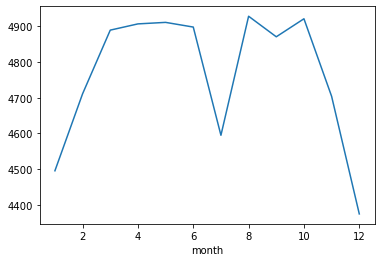

In [36]:
# Generate a line plot

by_month["traffic_volume"].plot.line()
plt.show()

The traffic volumes are quite high and almost the same for the warm months (spring and summer): March to June, and August to October. Also, the traffic volumes are smaller in the cold months (winter): January, February, November and December. The is a significant drop in traffic volumes in July.

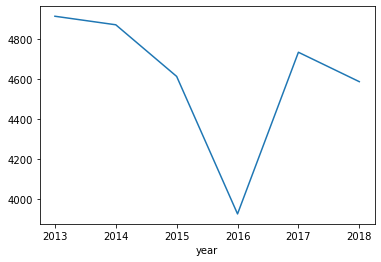

In [47]:
# Create a new column for the years
day_time["year"] = day_time["date_time"].dt.year

# Create a dataframe for the month July
only_july = day_time[day_time["month"] == 7]

# Group by year
by_year = only_july.groupby("year").mean()
by_year["traffic_volume"].plot.line()
plt.show()

For most years, the traffic is heavy in July, similar to the other warm months. The only exception is the year 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports this hypothesis.

## Time Indicators (II)

We'll now continue with building line plots for another time unit: day of the week.

In [38]:
# Get the traffic volume averages for each day of the week

day_time["dayofweek"] = day_time["date_time"].dt.dayofweek
by_dayofweek = day_time.groupby("dayofweek").mean()
by_dayofweek["traffic_volume"]  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

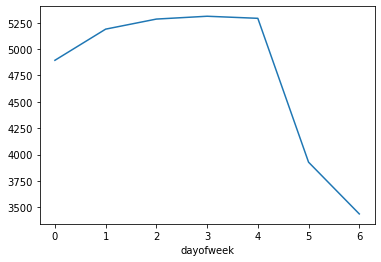

In [39]:
# Generate the line plot
by_dayofweek["traffic_volume"].plot.line()
plt.show()

From the line plot, we notice that there is a significant difference in traffic volumes between business days and the weekend. Specifically, the traffic is much lighter on Saturdays and Sundays, with values below 4,000; among business days, Mondays have lighter traffic, below 5,000 cars.

## Time Indicators (III)

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [49]:
# Create a new column for hours
day_time["hour"] = day_time["date_time"].dt.hour

# Create a copy of dataframe 'day_time' for business days
business_days = day_time.copy()[day_time["dayofweek"]  <= 4] # Friday is 4

# Create a copy of dataframe 'day_time' for weekend days
weekend = day_time.copy()[day_time["dayofweek"] >= 5]

# Group averages by hours
by_hour_business = business_days.groupby("hour").mean()
by_hour_weekend = weekend.groupby("hour").mean()

# Print traffic volume columns
print(by_hour_business["traffic_volume"])
print(by_hour_weekend["traffic_volume"])


hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


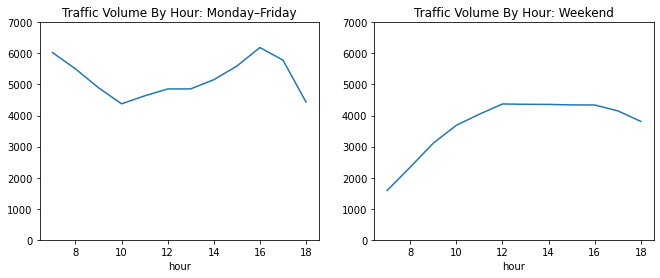

In [54]:
# Generate two line plots on a grid chart

plt.figure(figsize=(11,4))

# First line subplot
plt.subplot(1,2,1)
by_hour_business["traffic_volume"].plot.line()
plt.title("Traffic Volume By Hour: Monday–Friday")
plt.ylim([0,7000])
# Second line subplot
plt.subplot(1,2,2)
by_hour_weekend["traffic_volume"].plot.line()
plt.title("Traffic Volume By Hour: Weekend")
plt.ylim([0,7000])
plt.show()


At each hour of the day, the traffic volume is generally higher during business days compared to the weekends.
The rush hours on business days are before 8 and at 4pm. That the traffic is heavier when people travel to and from work may explain this. On weekends, the traffic volume is around 4,000 cars at most hours, except for before 10am.

 We summary, we have the following time indicators for heavy traffic;
 - Traffic is heavier during the warm months (Mar-Oct) and lighter during the cold months (Nov-Feb).
 - Traffic is heavier during business days compared to weekends.
 - Traffic is heavier on most hours during business days compared to weekends. The rush hours on business days are before 8am and 4pm, which are expectedly understandable given the working hours. 

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [60]:
# Overview of correlations for traffic dataframe
day_time.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,year,hour
temp,1.000000,0.010815,-0.019286,-0.135519,0.128317,0.222072,0.000188,0.132855,0.162691
rain_1h,0.010815,1.000000,-0.000091,0.004993,0.003697,0.001176,-0.009683,0.001290,0.008279
snow_1h,-0.019286,-0.000091,1.000000,0.027721,0.001265,0.026768,-0.008814,-0.004546,0.003923
clouds_all,-0.135519,0.004993,0.027721,1.000000,-0.032932,0.000595,-0.041980,-0.030387,0.023685
traffic_volume,0.128317,0.003697,0.001265,-0.032932,1.000000,-0.022337,-0.416453,-0.003557,0.172704
month,0.222072,0.001176,0.026768,0.000595,-0.022337,1.000000,0.013656,-0.158583,0.008145
dayofweek,0.000188,-0.009683,-0.008814,-0.041980,-0.416453,0.013656,1.000000,-0.012123,-0.002767
year,0.132855,0.001290,-0.004546,-0.030387,-0.003557,-0.158583,-0.012123,1.000000,-0.003822
hour,0.162691,0.008279,0.003923,0.023685,0.172704,0.008145,-0.002767,-0.003822,1.000000


In [61]:
#  Correlation values between traffic_volume and the numerical weather columns
day_time.corr()[["temp","rain_1h", "snow_1h", "clouds_all"]]

,temp,rain_1h,snow_1h,clouds_all
temp,1.000000,0.010815,-0.019286,-0.135519
rain_1h,0.010815,1.000000,-0.000091,0.004993
snow_1h,-0.019286,-0.000091,1.000000,0.027721
clouds_all,-0.135519,0.004993,0.027721,1.000000
traffic_volume,0.128317,0.003697,0.001265,-0.032932
month,0.222072,0.001176,0.026768,0.000595
dayofweek,0.000188,-0.009683,-0.008814,-0.041980
year,0.132855,0.001290,-0.004546,-0.030387
hour,0.162691,0.008279,0.003923,0.023685


The weather column with the strongest correlation with traffic_volume is temperature with r=+0.12. We'll plot a scatter plot for this temperature column and traffic_volume.

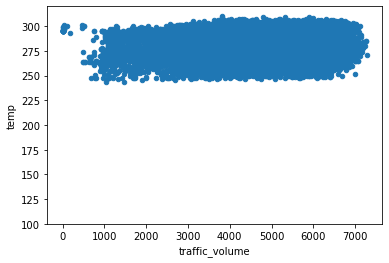

In [65]:
# Generate a scatter plot
day_time.plot.scatter(x="traffic_volume",y="temp")
plt.ylim(100, 320)
plt.show()

As all correlation values between traffic volume and weather columns are close to 0, there is no correlation. Thus, we can conclude that weather columns don't seem to be reliable indicators for heavy traffic.

## Weather Types

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description

In [68]:
# Calculate the average values
by_weather_main = day_time.groupby("weather_main").mean()
by_weather_description = day_time.groupby("weather_description").mean()

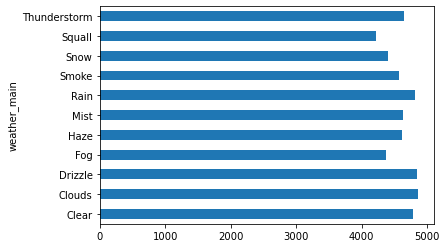

In [70]:
# Plot a horizontal bar plot for the traffic_volume column of by_weather_main
by_weather_main["traffic_volume"].plot.barh()
plt.show()

From the bar plot, we see that there is no traffic volume exceeding 5,000 cars. Recall from the statistics about traffic volume colume above, 75% of the time, the number of cars was less than 5,559. THus, we can assume that there is no weather type as a heavy traffic indicator.

<AxesSubplot:ylabel='weather_description'>

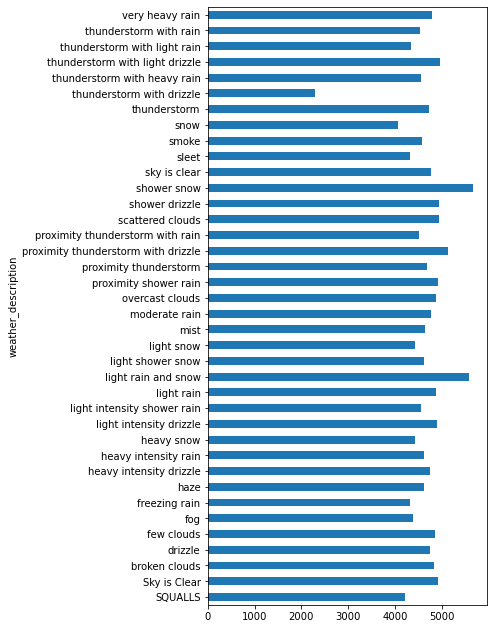

In [77]:
# Plot a horizontal bar plot for the traffic_volume column of by_weather_description
by_weather_description["traffic_volume"].plot.barh(figsize=(5,11))

There are traffic volume exceeding 5,000 cars when the weather descriptions are 'light rain and snow', 'proximity thunderstorm and drizzle', and 'shower snow'. These are not necessarily bad weather, so they can't be said to be heavy traffic indicators.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7 and 16.
- Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle